# Análisis exploratorio de series de tiempo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

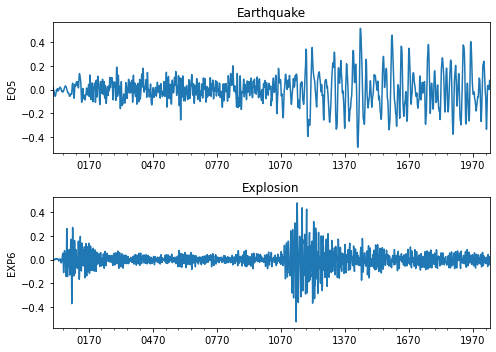

In [4]:
# Gráfico Inicial
# Arrival phases from an earthquake (top) and explosion (bottom) at 40 points per second.
# The recording instruments in Scandinavia are observing earthquakes and mining explosions
# The general problem of interest is in distinguishing or discriminating between waveforms generated by earthquakes and those generated by explosions.
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], ylabel="EQ5", title="Earthquake", legend=False)
EXP6.plot(ax=axes[1], ylabel="EXP6", title="Explosion", legend=False)
fig.tight_layout()
plt.show()

### Funciones de soporte para graficar funciones de autocorrelación

In [11]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax


## Eliminar la tendencia usando estimación

Ejemplo usando los datos de temperatura global

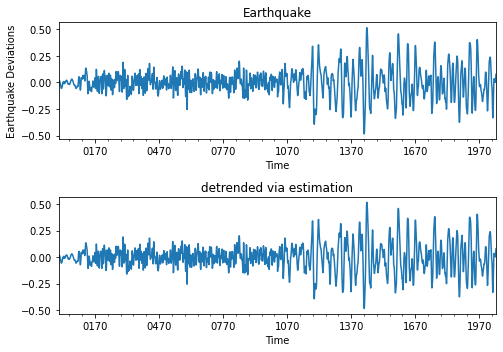

In [10]:
time = pd.Series([idx.ordinal for idx in EQ5.index], index=EQ5.index)
data_reg = pd.concat([time, EQ5], axis=1)
data_reg.columns = ["time", "EQ5"]

fit = ols(formula="EQ5 ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], xlabel='Time', ylabel='Earthquake Deviations', title='Earthquake', legend=False)

fit.resid.plot(ax=axes[1], xlabel="Time", title="detrended via estimation")
fig.tight_layout()
plt.show()
# cómo se puede ver desde la gráfica anterior hay una clara tendencia en la gráfica y esa tendencia es horizontal con centro cero.
#causando directamente que el método de tendencia no sea útil porque nos brinda al final la misma gráfica al restarle 0 siempre.

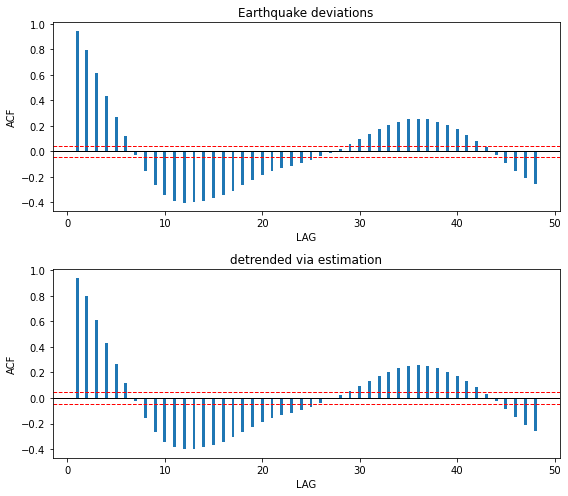

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(EQ5, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Earthquake deviations")

acf1(fit.resid, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("detrended via estimation")

fig.tight_layout()
plt.show()
#una vez más pero con autocorrelogramas se puede ver cómo las dos gráficas son iguales y no son para nada estacionarias.

## Eliminar la tendencia usando diferenciación

Ejemplo usando los datos de temperatura global

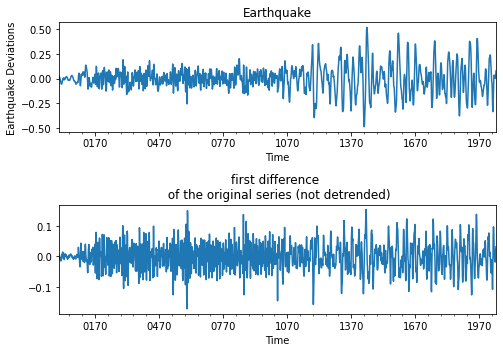

In [13]:
time = pd.Series([idx.ordinal for idx in EQ5.index], index=EQ5.index)
data_reg = pd.concat([time, EQ5], axis=1)
data_reg.columns = ["time", "EQ5"]

fit = ols(formula="EQ5 ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], xlabel='Time', ylabel='Earthquake Deviations', title='Earthquake', legend=False)

EQ5.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original series (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()
# cómo podemos ver aca de cierta forma estamos acercandonos mucho a crear un ruido blanco, hay media cero y una varianza cercana a pareja.
# esuna transformación que parece ser un poco más estacionaria

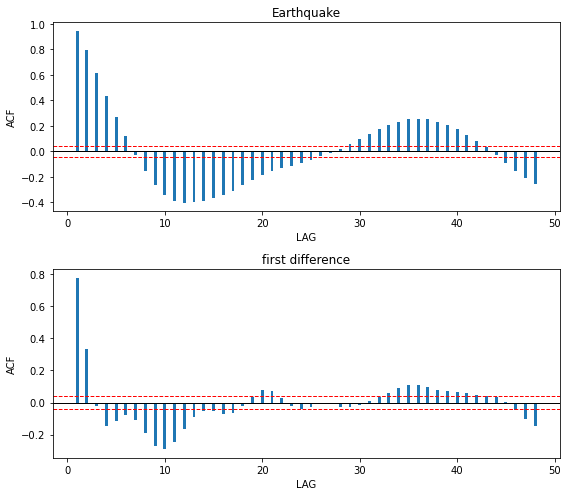

In [14]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(EQ5, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Earthquake")

acf1(EQ5.diff().dropna(), nlags=48, ax=axes[1], width=.3)
axes[1].set_title("first difference")

fig.tight_layout()
plt.show()

#este gráfico nos ayuda a comprobar de cierta forma lo que ya habiamos mencionado, cómo nos estamos acercando bastantea lo que deseamos.

### Transformación logarítmica de una serie para reducir sus extremos 

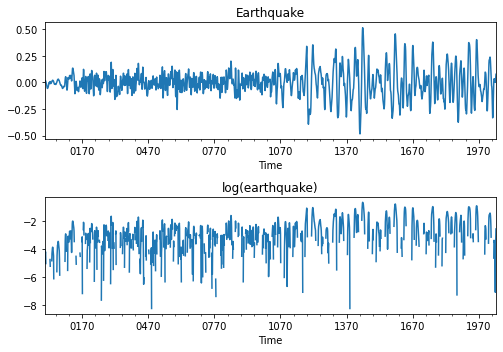

In [16]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
EQ5.plot(ax=axes[0], title="Earthquake", xlabel="Time", legend=False)
EQ5.apply(np.log).plot(ax=axes[1], title="log(earthquake)", xlabel="Time", legend=False)
fig.tight_layout()
plt.show()
# esta serie no se puede considerar como estacionaria, se podria decir que incluso tiene más picos que la pasada. 
# Mostrando que deben ser muchos los picos para que esta transformación tenga sentido realmente.

NameError: name 'apply' is not defined

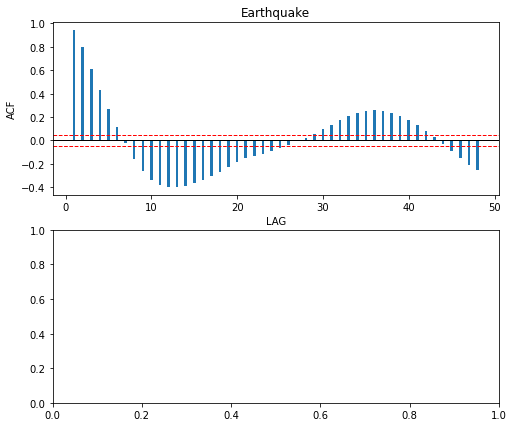

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(EQ5, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Earthquake")

acf1(EQ5(apply(np.log)).dropna(), nlags=48, ax=axes[1], width=.3)
axes[1].set_title("first difference")

fig.tight_layout()
plt.show()